In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Task 1
from scipy.stats import norm
mean_ret=1332
sd_ret=725
x1=2000

z_x1=(x1-mean_ret)/sd_ret
print('z score of $2000= ', z_x1)
z_value=norm.cdf(z_x1)
print("Probability associated with $2000 is", z_value)

z_act=1-norm.cdf(z_x1)
print("The probability of tax returns greater than $2000 are ", z_act)


z score of $2000=  0.9213793103448276
Probability associated with $2000 is 0.8215737866020797
The probability of tax returns greater than $2000 are  0.1784262133979203


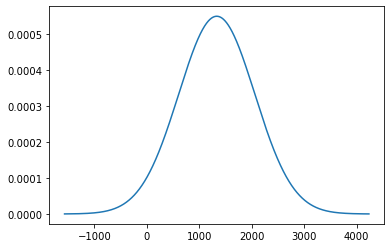

In [58]:
lower_p1=mean_ret-4*sd_ret
upper_p1=mean_ret+4*sd_ret
norm_p1=np.arange(lower_p1,upper_p1)
plt.plot(norm_p1,norm.pdf(norm_p1,mean_ret,sd_ret))
plt.show()

In [63]:
x3=100
x4=700
z_x3=(x3-mean_ret)/sd_ret
print('z score of $100= ', z_x3)
z_value3=norm.cdf(z_x3)
print("Probability associated with $100 is", z_value3)

z_x4=(x4-mean_ret)/sd_ret
print('z score of $700= ', z_x4)
z_value4=norm.cdf(z_x4)
print("Probability associated with $700 is", z_value4)

print("Probability of price between $100 and $700 is ", z_value4-z_value3)










z score of $100=  -1.6993103448275861
Probability associated with $100 is 0.04463036222315338
z score of $700=  -0.8717241379310345
Probability associated with $700 is 0.19167944440584644
Probability of price between $100 and $700 is  0.14704908218269308


In [2]:
# Task 2

import pandas as pd
comp_df=pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')
comp_df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [9]:
price_df=comp_df[(comp_df.price<=4000)]
price_df


,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [10]:
grouped_comp_df=price_df.groupby(['screen'])
screen_size=price_df.screen.unique()
strata_sample_df=pd.DataFrame()
for s in screen_size:
    comp_data=grouped_comp_df.get_group(s)
    sample_data=comp_data.sample(frac=.1, random_state=1, replace=True)
    strata_sample_df=strata_sample_df.append(sample_data,ignore_index=True)
    
print(strata_sample_df)

     index  price  speed    hd  ram  screen   cd multi premium  ads  trend
0     1530   2295     33   426    8      14   no    no     yes  283     10
1      325   1690     33    85    2      14   no    no     yes  108      4
2     1582   1499     25   120    4      14   no    no     yes  283     10
3     1307   2690     33   528   16      14   no    no     yes  246      9
4     4247   2494     33   720   16      14  yes    no     yes  248     20
..     ...    ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
618   3865   2118     66   340    8      17  yes    no     yes  273     18
619    359   3125     66   250    8      17   no    no     yes  108      4
620   2032   2595     66   424    4      17   no    no     yes  259     11
621   3835   2390     33   540    8      17  yes    no     yes  273     18
622   4926   2409     66  1000    8      17   no    no     yes  191     23

[623 rows x 11 columns]


In [ ]:
# part 3

In [11]:
import statistics as st
comp_s=strata_sample_df['price'].tolist()
s_mean=st.mean(comp_s)
s_median=st.median(comp_s)

print("sample mean =", s_mean )
print("sample median =", s_median )

sample mean = 2189.593900481541
sample median = 2143


In [12]:
comp_p=comp_df['price'].tolist()
p_mean=st.mean(comp_p)
p_median=st.median(comp_p)

print("Population mean =", p_mean )
print("Population median =", p_median )

Population mean = 2219.576609682058
Population median = 2144


In [14]:
import math
p_sd=st.stdev(comp_p)
s_sd=st.stdev(comp_s)
sd_f_p=p_sd/math.sqrt(len(comp_s))
print("Population SD ", p_sd)
print("sample SD ", s_sd)
print("Sample SD from Population SD ", sd_f_p)


Population SD  580.8039556527063
sample SD  561.3056985543769
Sample SD from Population SD  23.269419129322955


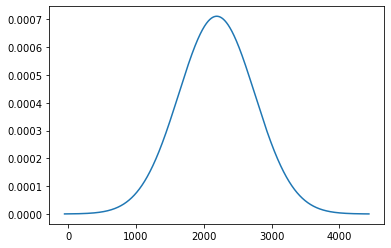

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm
lower_s=s_mean-4*s_sd
upper_s=s_mean+4*s_sd
norm_s=np.arange(lower_s,upper_s)
plt.plot(norm_s, norm.pdf(norm_s, s_mean, s_sd))
plt.show()


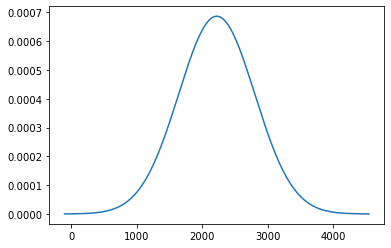

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import norm
lower_p=p_mean-4*p_sd
upper_p=p_mean+4*p_sd
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd))
plt.show()

In [50]:
# Standard normal probability distribution

std_data=[]
for x in norm_s:
    zs=(x-s_mean)/s_sd
    std_data.append(zs)

    


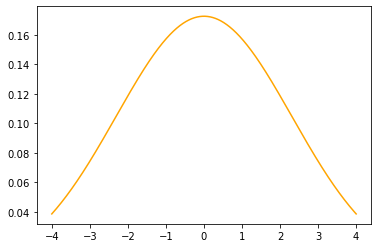

In [37]:
import numpy as np
x_all=np.arange(std_data[0], std_data[-1], 10)
plt.plot(std_data, norm.pdf(std_data, st.mean(std_data), st.stdev(std_data)), color="orange")
plt.show()

In [33]:
a1=2700
a2=1301
a3=2000
a4=2900
mean= 2189.5939
sd=2143

z1=(a1-mean)/sd
z2=(a2-mean)/sd
z3=(a3-mean)/sd
z4=(a4-mean)/sd
print("z score of $2700 is ", z1)
print("z score of $1301 is ", z2)
print("z score of $2000 is ", z3)
print("z score of $2900 is ", z4)

b1=norm.cdf(z1)
b2=norm.cdf(z2)
b3=norm.cdf(z3)
b4=norm.cdf(z4) 


print("Probability associated with z=$2700 is ", norm.cdf(z1) )
print("Probability associated with z=$1301 is ", norm.cdf(z2) )
print("Probability associated with z=$2000 is ", norm.cdf(z3) )
print("Probability associated with z=$2900 is ", norm.cdf(z4) )


z score of $2700 is  0.238173635090994
z score of $1301 is  -0.4146495100326644
z score of $2000 is  -0.08847125524964995
z score of $2900 is  0.3315007466168923
Probability associated with z=$2700 is  0.5941267875323177
Probability associated with z=$1301 is  0.33919924931460577
Probability associated with z=$2000 is  0.4647510648605825
Probability associated with z=$2900 is  0.6298668614400782


In [36]:
print("Probability of price greater than $2700 is ", 1-b1)
print("Probability of price less than $1301 is ", b2)
print("Probability of price between $2000 and $2900 is ", b4-b3)


Probability of price greater than $2700 is  0.40587321246768227
Probability of price less than $1301 is  0.33919924931460577
Probability of price between $2000 and $2900 is  0.1651157965794957
